#### Gerando datasets aleatórios
* Configurando numero de features=2
* configurando samples=300
* configurando numero de clusters e desvio padrao em relacao aos clusters

Fonte dos exemplos: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

(300, 2)


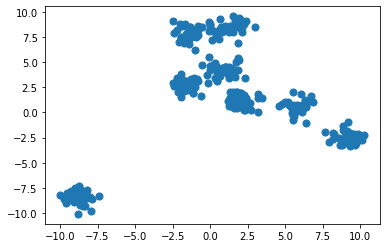

In [13]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

X, y_true = make_blobs(n_features=2, n_samples=300, centers=8, cluster_std=0.60, random_state=0)

print(X.shape)

#Plotando gráfico considerando as duas dimensoes de X, S indica o tamanho do ponto no gráfico
plt.scatter(X[:, 0], X[:, 1], s=50);

### Executando algoritmo K-means
* número de clusters é obrigatório

### Na primeira execução utilizamos o número de clusters igual ao utilizado para criar a base de dados aleatória


In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

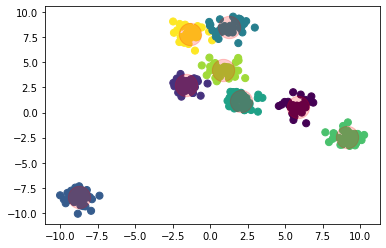

In [22]:
# cmap = colormap
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

#print(kmeans.labels_)

#plotando no mesmo gráfico anterior os centros dos clusters identificados pelo K-means
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=0.2)
plt.show()

### Na segunda execução utilizamos o número de clusters igual a metade da quantidade utilizada para criar a base de dados aleatória


In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

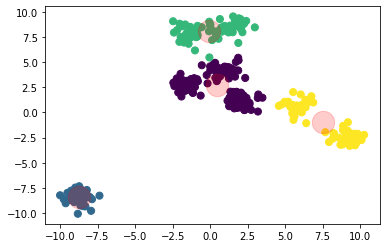

In [24]:
# cmap = colormap
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

#plotando no mesmo gráfico anterior os centros dos clusters identificados pelo K-means
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=0.2)
plt.show()

### Possível, implementação do Kmeans

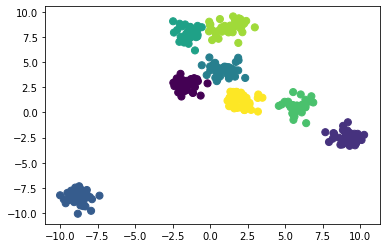

In [42]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 8)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

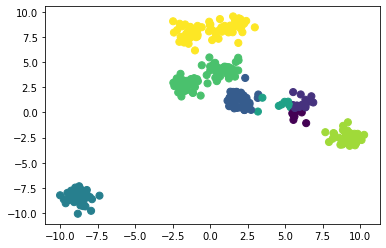

In [43]:
centers, labels = find_clusters(X, 8, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

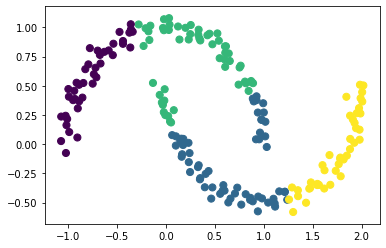

In [51]:
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

### Exemplo com diferentes formatos de cluster

#### Funcao make moons : monta cluster em formato semi circulo (visao 2d)

In [47]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

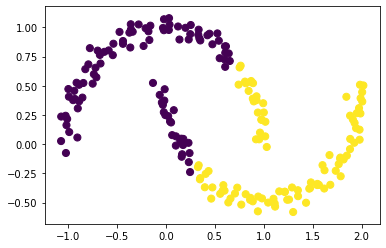

In [50]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

* SpectralClustering: uma versão do K-means que redimensiona os dados, para realizar agrupamento em conjuntos com fronteiras mais complexas de identificar



C:\Users\lazaropd\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


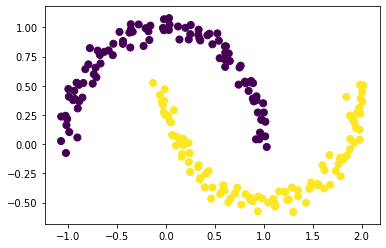

In [52]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

* A cada iteração de k-means deve acessar todos os pontos do conjunto de dados
* Isso pode tornar o algortimo lento à medida que o número de amostras cresce. 
* Quando o desempenho se torna uma barreira é possível utilizar o sklearn.cluster.MiniBatchKMeans, que recriar os centróides usando uma amostra dos dados

### Teste comparativo entre KMeans e MiniBatchKMeans
+ Usando 500000 amostras

(500000, 2)


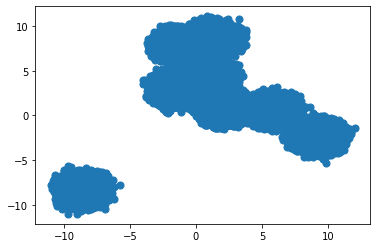

In [54]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_features=2, n_samples=500000, centers=8, cluster_std=0.60, random_state=0)

print(X.shape)

#Plotando gráfico considerando as duas dimensoes de X, S indica o tamanho do ponto no gráfico
plt.scatter(X[:, 0], X[:, 1], s=50);

### Tempo de execução do MiniBatchKMeans nesse servidor é menor quando comparado com KMeans

In [55]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

now = datetime.now()
current_time = now. strftime("%H:%M:%S")
print("KMeans Current Time =", current_time)


now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

kmeans = MiniBatchKMeans(n_clusters=8)
kmeans.fit(X)

now = datetime.now()
current_time = now. strftime("%H:%M:%S")
print("MiniBatchKMeans Current Time =", current_time)

y_kmeans = kmeans.predict(X)

Current Time = 14:49:00
KMeans Current Time = 14:49:05
Current Time = 14:49:05
MiniBatchKMeans Current Time = 14:49:07


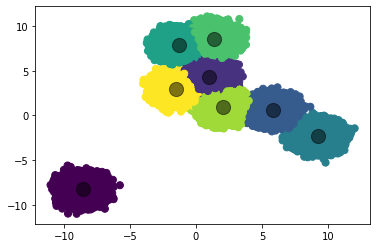

In [56]:
# cmap = colormap
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

#plotando no mesmo gráfico anterior os centros dos clusters identificados pelo K-means
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Escolhendo valor de K
* Fatores definidos a priori: 
    * Ex: X e Y representa Lat/Log e deseja identificar dois grupos para encontrar pontos mais próximos entre si em cada grupo
* Valor de K que cria grupos muito bem definidos em relação as características       

### Uma forma de escolher o melhor valor de K, é o método de Elbow
* Nesse método é utilizado a porcentagem de variancia em função do número de clusters

* Essa técnica fornece uma representação gráfica sucinta de quão bem cada objeto foi classificado.
    * Para isso pode ser usado a métrica  silhouette que é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). 
    * O valor varia de -1 a +1, quanto mais alto maior a coesão
    * Ou pode-se utilizar também  métrica de distância, (Euclidiana, Manhattan, etc)

(300, 2)


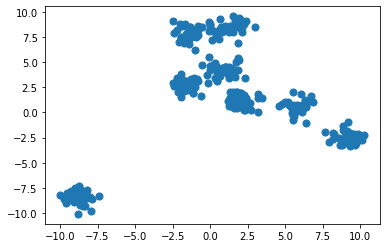

In [57]:
X, y_true = make_blobs(n_features=2, n_samples=300, centers=8, cluster_std=0.60, random_state=0)

print(X.shape)
#Plotando gráfico considerando as duas dimensoes de X, S indica o tamanho do ponto no gráfico
plt.scatter(X[:, 0], X[:, 1], s=50);

### Método de Elbow comparando 
* distancia Euclidiana 
* Silhouette

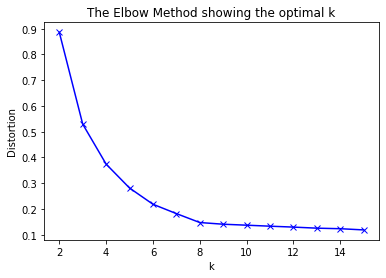

In [60]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []

K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'mahalanobis'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

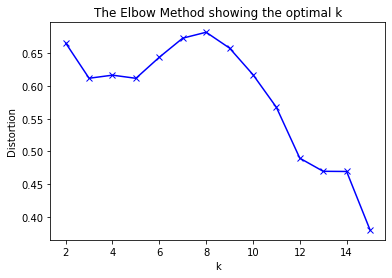

In [61]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

# k means determine k
silhouette = []
K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    silhouette.append(silhouette_score(X, kmeanModel.labels_))
    
# Plot the elbow
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Interpretação de resultados Kmeans
* O que torna um cluster diferente dos outros?
* Quais são os clusters semelhantes entre si?
    
* O Arquivo california-election-2016.csv mostra uma pesquisa com 17 perguntas (sim/nao)

    * legalização da maconha
    * Obrigatoriedade de atores em filmes adultos usarem preservativos
    * dificultar a compra de armas de fogo etc.


* Cada linha representa cada município da Califórnia (58)

* Há uma coluna que indica qual partido (republicano ou democrata) do candidato presidencial (Trump ou Hilary) cada condado apoiou em maioria

Fonte: https://blog.exploratory.io/visualizing-k-means-clustering-results-to-understand-the-characteristics-of-clusters-better-b0226fb3dd10

### Abaixo carregamos o arquivo e codificamos variaveis categoricas

In [71]:
from sklearn.preprocessing import LabelEncoder as le
import pandas as pd 

le = le()
df = pd.read_csv('dataset/election.csv')

df['Class'] = le.fit_transform(df['PARTY_NAME'])
y = df.Class
X=df.drop(['COUNTY_NAME','PARTY_NAME','Class'], axis=1)

X.shape

(58, 17)

In [74]:
X.sample(5).T

,17,15,24,29,56
Adult Film Condom Requirements,0.314394,0.463249,0.345449,0.465813,0.407022
Ban on Single-use Plastic Bags,0.282501,0.334917,0.272123,0.430508,0.595665
Carryout Bag Charges,0.262822,0.338461,0.237192,0.430586,0.459989
Cigarette Tax,0.392140,0.492842,0.369979,0.609151,0.687754
Corporate Political Spending Advisory Question,0.377541,0.361707,0.370954,0.466240,0.605567
Criminal Sentences & Juvenile Crime Proceedings,0.340180,0.448619,0.428916,0.579580,0.680445
Death Penalty Procedure Time Limits,0.600728,0.533745,0.524626,0.591179,0.463319
English Proficiency. Multilingual Education.,0.573997,0.649789,0.591262,0.681567,0.772290
Firearms and Ammunition Sales,0.185062,0.407122,0.199894,0.595065,0.641318
K-12 and Community College Facilities,0.360533,0.513564,0.315127,0.490487,0.541859


### Em seguida rodamos Kmeans

In [75]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape
print(clusters.shape)
print(clusters)

(58,)
[1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0]


### Incluimos o cluster de cada linha na base

In [76]:
df['clusters'] = clusters
y_hat = clusters

In [78]:
print(df.describe().T)
print(df.columns)

                                                 count      mean       std  \
Adult Film Condom Requirements                    58.0  0.412685  0.062962   
Ban on Single-use Plastic Bags                    58.0  0.480511  0.127601   
Carryout Bag Charges                              58.0  0.407685  0.073335   
Cigarette Tax                                     58.0  0.565337  0.107098   
Corporate Political Spending Advisory Question    58.0  0.499649  0.096090   
Criminal Sentences & Juvenile Crime Proceedings   58.0  0.584014  0.108129   
Death Penalty Procedure Time Limits               58.0  0.515499  0.062879   
English Proficiency. Multilingual Education.      58.0  0.696355  0.068373   
Firearms and Ammunition Sales                     58.0  0.489096  0.161043   
K-12 and Community College Facilities             58.0  0.496472  0.081446   
Legislative Procedure Requirements                58.0  0.633849  0.029586   
Marijuana Legalization                            58.0  0.541068

### A partir daí, é possível fazer diversas análise exploratórias

* Abaixo é feita uma comparação entre partido e posicionamento quanto a legalização da Maconha em cada cluster:

In [83]:
c0 = df.loc[df['clusters']==0]
print(c0['Class'].unique())
print(c0['Marijuana Legalization'].mean())
c1 = df.loc[df['clusters']==1]
print(c1['Class'].unique())
print(c1['Marijuana Legalization'].mean())

print()
c0 = df.loc[df['clusters']==0]
print(c0['PARTY_NAME'].unique())
print(c0['Marijuana Legalization'].mean())
c1 = df.loc[df['clusters']==1]
print(c1['PARTY_NAME'].unique())
print(c1['Marijuana Legalization'].mean())

[1 0]
0.49747609374327717
[0]
0.6028233103143372

['Republican' 'Democratic']
0.49747609374327717
['Democratic']
0.6028233103143372


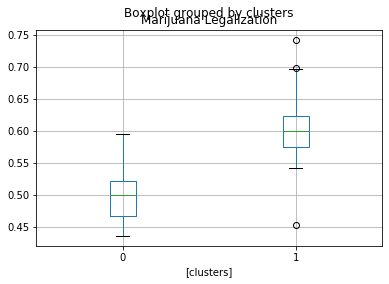

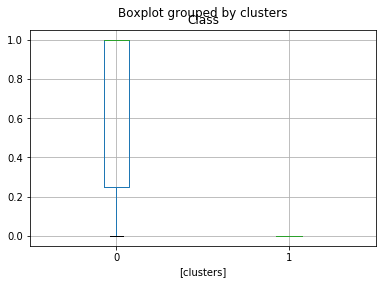

In [85]:
df.boxplot(column=['Marijuana Legalization'], by=['clusters'])
df.boxplot(column=['Class'], by=['clusters'])
plt.show()

### Exemplo com Mnist
* Usando aprendizagem não-supervisionada para descobrir relação entre atributos, que definam as classes anotadas
    * Uso de aprendizagem não-supervionada como opção a classificação supervisionada
* Exemplo: classificação na Base Mnist
    Separando K-means em 10 clusters, de forma que o algortimo crie um cluster para cada número

In [89]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('../../../bigdata/mnist-in-csv/mnist_train.csv')

X = df.drop(['label'], axis=1)
y = df[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

* Modelo Kmeans usando 10 cluster ( mesmo número de dígitos na base)

In [90]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(10, 784)

In [91]:
print(kmeans.cluster_centers_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(10, 784)


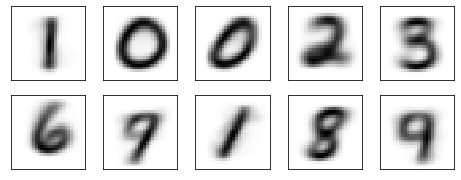

In [92]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
print(kmeans.cluster_centers_.shape)
centers = kmeans.cluster_centers_.reshape(10, 28, 28)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Data shape (1797, 64)
Centers (100, 64)


0.9799666110183639

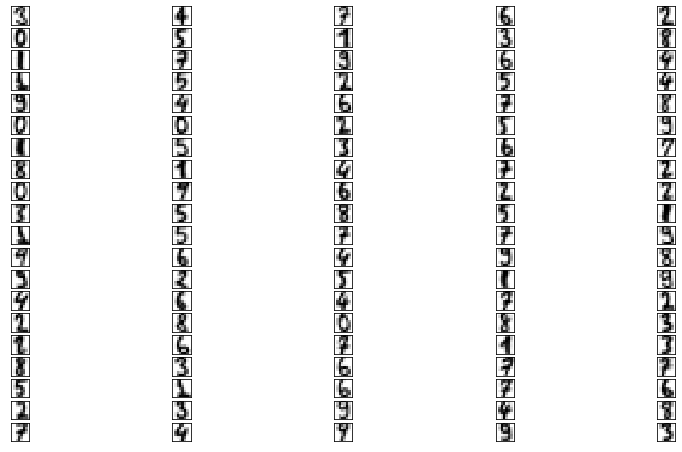

In [121]:
n = 100

from sklearn.datasets import load_digits
digits = load_digits()
print('Data shape', digits.data.shape)

kmeans = KMeans(n_clusters=n, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print('Centers', kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(int(n/5), 5, figsize=(14, 8))
centers = kmeans.cluster_centers_.reshape(n, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(n):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] 

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

In [118]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

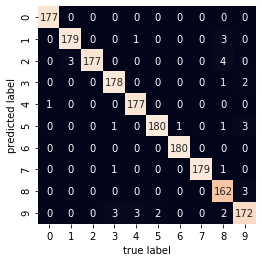

In [122]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [123]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535